## Objective
The goal of this project is to build a machine learning model that predicts whether a person is likely to have heart disease based on various medical features such as age, cholesterol, blood pressure, chest pain type, and more.
I implemented and compared two algorithms, Decision Tree and Random Forest, to understand how well they can learn patterns from health data and make accurate predictions. My aim was not just to build a working model but to explore how different techniques behave and which one generalizes better to unseen data.

## Problem Statement
Heart disease remains one of the most critical global health challenges, with early detection being key to effective treatment and prevention. In this project, I aimed to build a predictive model using machine learning techniques to classify whether a patient is at risk of heart disease based on various clinical features.
By doing so, my objective was to explore how data-driven approaches can support healthcare providers in making faster, more accurate diagnoses, ultimately contributing to life-saving interventions. This project allowed me to apply and strengthen my skills in EDA, classification modeling, evaluation metrics, and hyperparameter tuning, while working on a problem with real-world significance.

In [36]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
# Loading the data.
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
# Converting num into 0 and 1.
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Checking value counts of target column.
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [9]:
# Checking for the null values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
# Rwmoving unnecessary columns
df=df.drop(['id','slope','ca','thal', 'dataset'], axis=1)

#Replacing null values.
# List of numerical columns
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']

# List of categorical columns
cat_cols = ['fbs', 'restecg', 'exang']

# For numeric.
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

# For categorical.
for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

# Encoding for columns with two categories.
label_cols = ['sex', 'fbs', 'exang']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Encoding for columns with many categories.
one_hot_cols = ['cp', 'restecg']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

C:\Users\anves\AppData\Local\Temp\ipykernel_6452\2349774331.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].fillna(df[col].mode()[0])


In [13]:
# Features (all columns except target)
x = df.drop('num', axis=1)

# Target column
y = df['num']

# Split data (80% train, 20% test) with stratify to keep class balance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Create the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model on training data
dt.fit(x_train, y_train)

# Predict on training and test data
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.7717391304347826


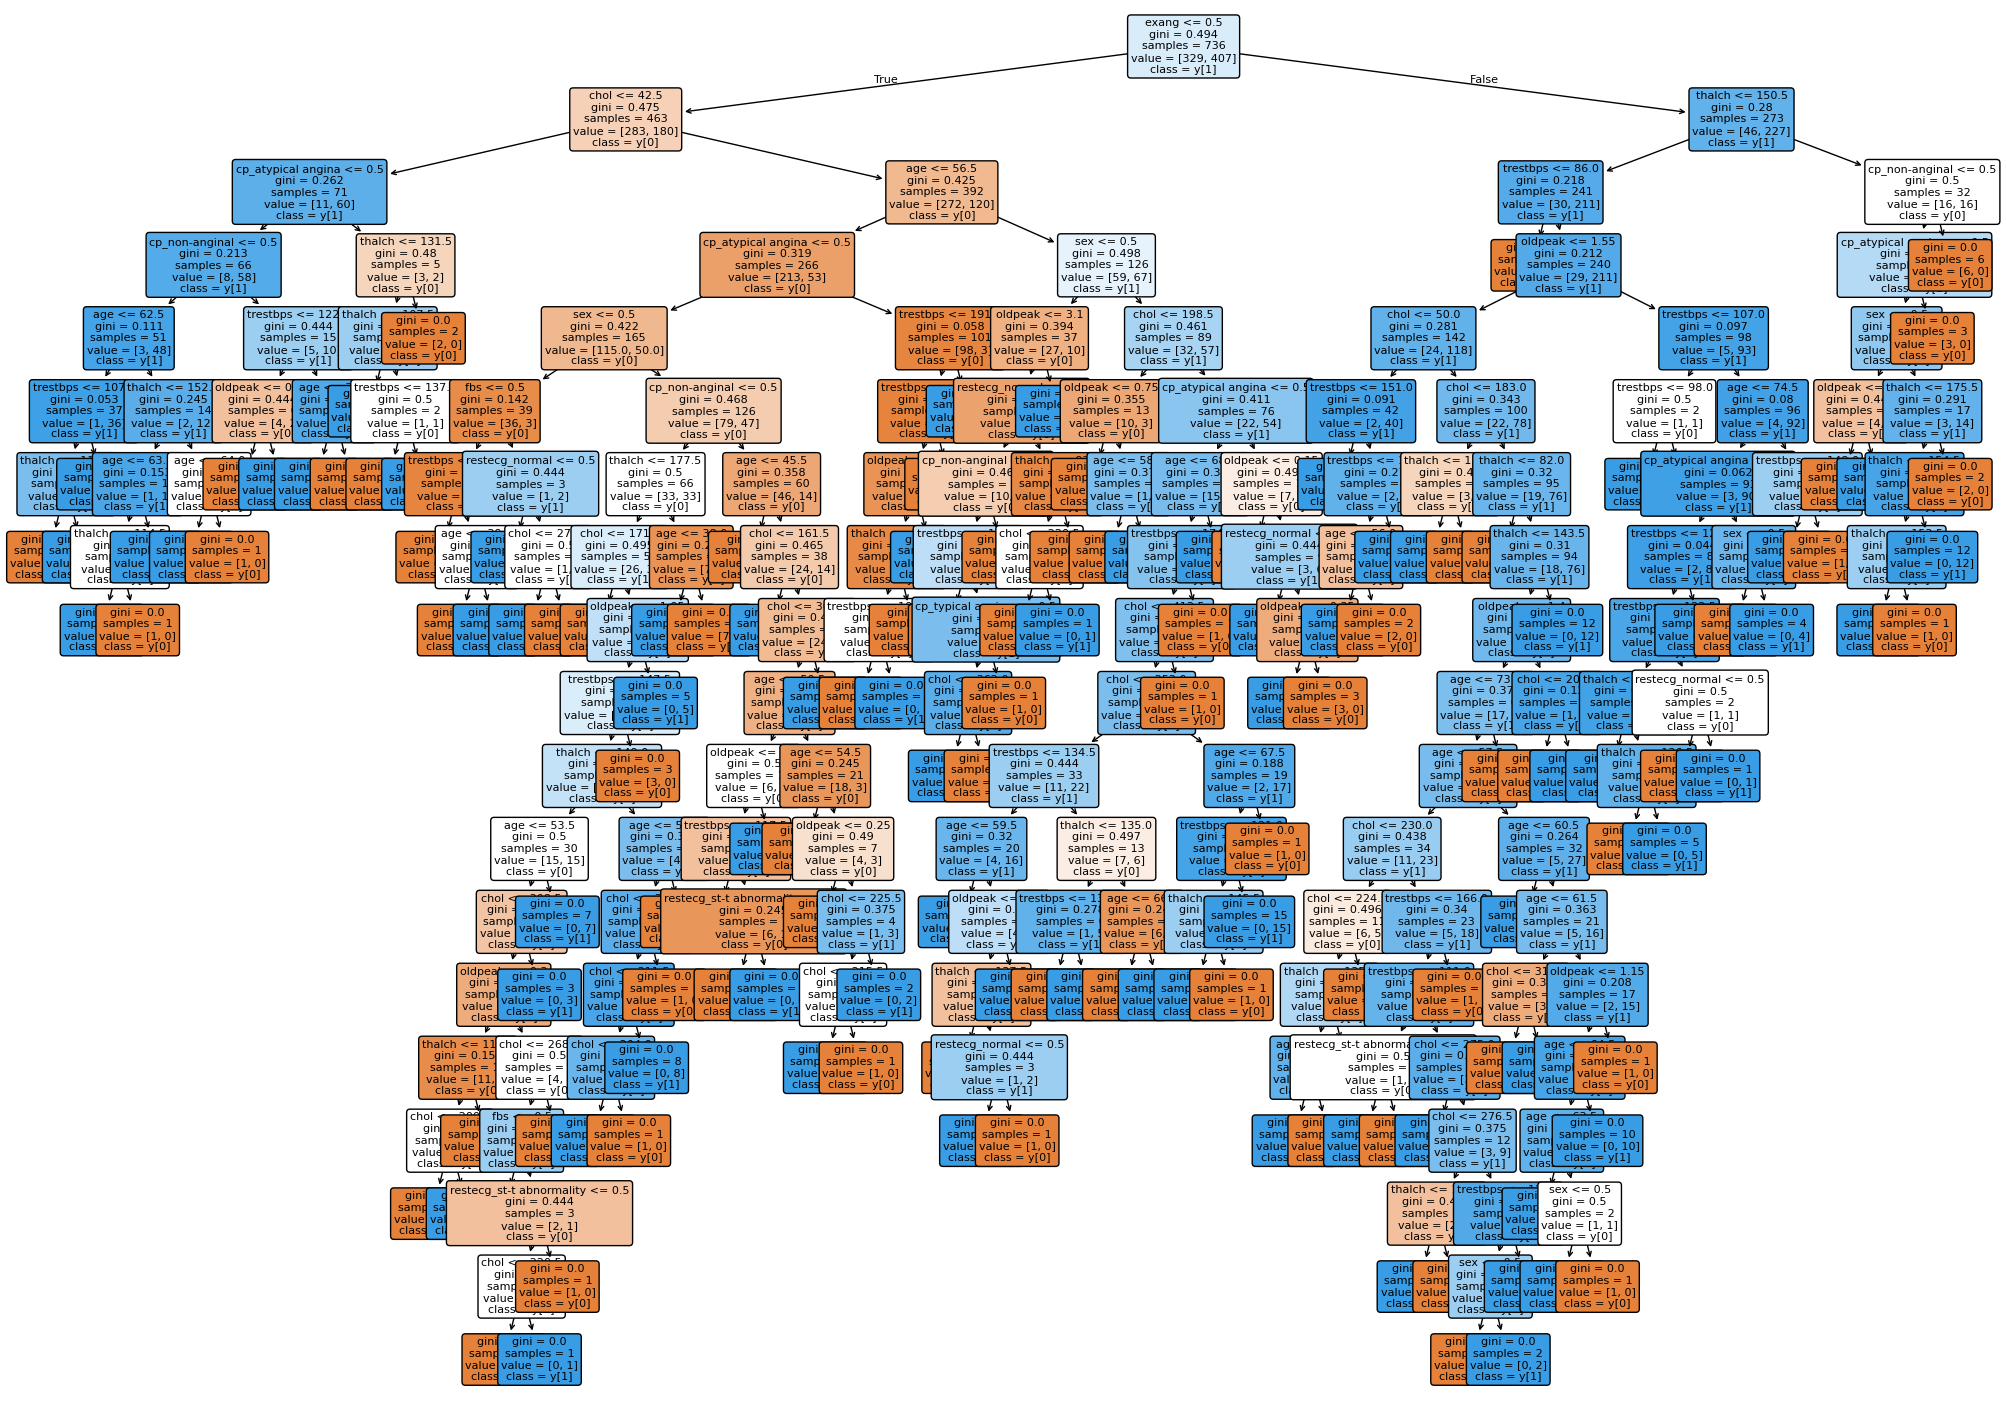

In [17]:
# Plot decision tree.
plt.figure(figsize=(25,18))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=True, rounded=True, fontsize=8)
plt.show()

In [19]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Predict on train and test data
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Calculate accuracy for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print accuracies
print("Decision Tree Training Accuracy:", train_accuracy)
print("Decision Tree Test Accuracy:", test_accuracy)
print("Random Forest Training Accuracy:", train_accuracy_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.7717391304347826
Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.8315217391304348


#### Interpretation
After training both, a Decision Tree and a Random Forest model and checked their accuracies on training and test data. Random Forest usually performs better because it combines many trees to reduce overfitting and generalizes well on new data. Decision Trees may overfit and perform worse on unseen data. In this case, the Random Forest showed higher test accuracy, proving it is more reliable for predictions. (83.12 > 77.17)

C:\Users\anves\AppData\Local\Temp\ipykernel_6452\3108162630.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


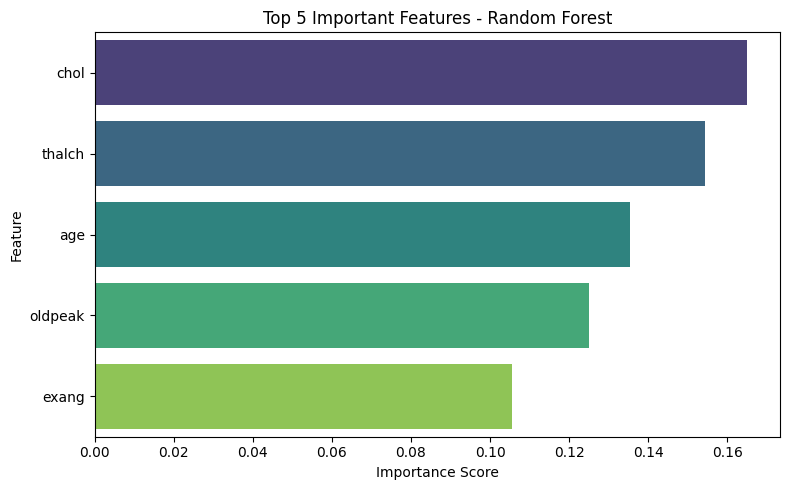

In [21]:
# Get feature importances from the model
importances = rf.feature_importances_
feature_names = x.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance and get top 5
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title("Top 5 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit on training data
grid_search.fit(x_train, y_train)

# Get best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy from GridSearchCV:", grid_search.best_score_)

# Evaluate on test set using best model
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(x_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


Best Parameters: {'max_depth': 5, 'n_estimators': 150}
Best Training Accuracy from GridSearchCV: 0.8138444567015997
Test Accuracy with Best Model: 0.8315217391304348


In [27]:
# 1. Predictions from base RF model
base_preds = rf.predict(x_test)

# 2. Predictions from GridSearchCV best model
tuned_preds = best_rf.predict(x_test)

# Print metrics for base model
print("Base Random Forest:")
print(confusion_matrix(y_test, base_preds))
print(classification_report(y_test, base_preds))

# Print metrics for best tuned model
print("Tuned Random Forest (GridSearchCV):")
print(confusion_matrix(y_test, tuned_preds))
print(classification_report(y_test, tuned_preds))

Base Random Forest:
[[64 18]
 [13 89]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Tuned Random Forest (GridSearchCV):
[[63 19]
 [12 90]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        82
           1       0.83      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



#### Interpretation.
I trained two Random Forest models, one with default settings and one after tuning using GridSearchCV. Surprisingly, the base model gave slightly better results in predicting class 0 (more correct negatives). The tuned model did a bit better for class 1 but overall accuracy stayed the same. So, tuning didn't make a big difference this time, and the base model was already working quite well.

## Final Interpretation
After training and evaluating both models:
- The Random Forest model performed better than the Decision Tree on the test data. It provided more consistent and accurate predictions due to its ensemble nature, which reduces overfitting.
- I also experimented with GridSearchCV for hyperparameter tuning. Interestingly, the default model already performed well, and tuning made only minor differences.
- The Decision Tree model showed signs of overfitting, which is common due to its depth and tendency to learn noise.

## Conclusion:
I found that Random Forest was more reliable and robust for heart disease prediction, achieving a higher test accuracy (83.12%) and offering better generalization than a single Decision Tree model.